# 영주시 날씨에 따른 사과 가격 예측 - Linear Regression

##### 라이브러리 불러오기

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

##### 데이터셋 불러오기 및 전처리

In [3]:
df = pd.read_excel('./back_data_final_real2.xlsx')
df

,일시,평균가격(원),총거래물량(kg),총거래금액(원),평균기온(°C),최저기온(°C),최고기온(°C),강수량,최대 순간 풍속(m/s),최대 순간 풍속 풍향,...,최소 상대습도(%),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),최저 초상온도(°C),취약계층수
0,2020-01-02,23825.000000,1200.0,2859000,0.7,-4.8,4.0,3.328571,13.3,290,...,52,65.6,4.2,1002.4,1031.4,1027.3,1029.0,-0.1,-6.1,35339
1,2020-01-03,20758.489360,69636.0,159041400,2.0,-1.9,5.3,3.971429,12.8,320,...,33,52.9,3.7,999.3,1027.9,1023.7,1025.7,1.5,-3.7,35339
2,2020-01-04,29777.616742,81055.0,140294100,0.3,-6.3,5.7,4.614286,11.8,270,...,42,61.4,3.8,999.0,1028.8,1022.6,1025.5,0.3,-9.2,35339
3,2020-01-05,0.000000,0.0,0,-1.6,-8.4,6.6,5.257143,3.4,320,...,34,68.3,3.6,1004.6,1033.1,1028.7,1031.5,-0.8,-11.1,35339
4,2020-01-06,28609.448045,202560.0,459338400,0.9,-4.6,3.7,5.900000,3.8,340,...,54,81.3,5.4,1002.0,1032.5,1023.9,1028.5,0.5,-6.7,35339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,2024-03-09,90588.023414,6520.0,29052800,1.9,-2.9,7.4,0.700000,9.8,320,...,20,44.1,3.0,997.2,1026.5,1020.4,1023.6,4.3,-5.0,36547
1529,2024-03-10,0.000000,0.0,0,3.6,-5.6,10.7,0.700000,10.7,290,...,21,45.8,3.3,1001.5,1030.3,1025.8,1027.8,4.8,-8.2,36547
1530,2024-03-11,95224.193359,78590.0,411866200,4.1,-2.4,10.4,0.700000,3.7,140,...,29,58.1,4.4,994.9,1027.5,1016.7,1021.0,4.0,-4.4,36547
1531,2024-03-12,87635.755649,74070.0,375004900,3.5,-1.4,10.6,0.000000,7.1,320,...,48,77.1,6.0,989.6,1019.4,1013.3,1015.7,3.7,-4.2,36547


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   일시             1533 non-null   datetime64[ns]
 1   평균가격(원)        1533 non-null   float64       
 2   총거래물량(kg)      1533 non-null   float64       
 3   총거래금액(원)       1533 non-null   int64         
 4   평균기온(°C)       1531 non-null   float64       
 5   최저기온(°C)       1533 non-null   float64       
 6   최고기온(°C)       1533 non-null   float64       
 7   강수량            1533 non-null   float64       
 8   최대 순간 풍속(m/s)  1533 non-null   float64       
 9   최대 순간 풍속 풍향    1533 non-null   int64         
 10  최대 풍속(m/s)     1532 non-null   float64       
 11  최대 풍속 풍향       1533 non-null   int64         
 12  평균 풍속(m/s)     1533 non-null   float64       
 13  풍정합(100m)      1533 non-null   int64         
 14  최다풍향           1530 non-null   float64       
 15  평균 이슬점온도(°C)   1531 n

In [6]:
df.isna().sum()

일시               0
평균가격(원)          0
총거래물량(kg)        0
총거래금액(원)         0
평균기온(°C)         2
최저기온(°C)         0
최고기온(°C)         0
강수량              0
최대 순간 풍속(m/s)    0
최대 순간 풍속 풍향      0
최대 풍속(m/s)       1
최대 풍속 풍향         0
평균 풍속(m/s)       0
풍정합(100m)        0
최다풍향             3
평균 이슬점온도(°C)     2
최소 상대습도(%)       0
평균 상대습도(%)       2
평균 증기압(hPa)      2
평균 현지기압(hPa)     2
최고 해면기압(hPa)     0
최저 해면기압(hPa)     1
평균 해면기압(hPa)     2
평균 지면온도(°C)      0
최저 초상온도(°C)      0
취약계층수            0
dtype: int64

In [9]:
# Null 값 처리
df['평균기온(°C)'] = df['평균기온(°C)'].fillna(round(np.mean(df['평균기온(°C)']),2))
# df['강수량'] = df['강수량'].fillna(0)
df['최대 풍속(m/s)'] = df['최대 풍속(m/s)'].fillna(round(np.mean(df['최대 풍속(m/s)']), 2))
df['최다풍향'] = df['최다풍향'].fillna(round(np.mean(df['최다풍향']), 2))
df['평균 이슬점온도(°C)'] = df['평균 이슬점온도(°C)'].fillna(round(np.mean(df['평균 이슬점온도(°C)']), 2))
df['평균 상대습도(%)'] = df['평균 상대습도(%)'].fillna(round(np.mean(df['평균 상대습도(%)']), 2))
df['평균 증기압(hPa)'] = df['평균 증기압(hPa)'].fillna(round(np.mean(df['평균 증기압(hPa)']), 2))
df['평균 현지기압(hPa)'] = df['평균 현지기압(hPa)'].fillna(round(np.mean(df['평균 현지기압(hPa)']), 2))
df['최저 해면기압(hPa)'] = df['최저 해면기압(hPa)'].fillna(round(np.mean(df['최저 해면기압(hPa)']), 2))
df['평균 해면기압(hPa)'] = df['평균 해면기압(hPa)'].fillna(round(np.mean(df['평균 해면기압(hPa)']), 2))


# 총 거래금액 0원인 행  제거
df = df[df['총거래금액(원)'] != 0]

# 날짜 열을 인덱스로 설정
df.set_index('일시', inplace=True)

df.head()

,평균가격(원),총거래물량(kg),총거래금액(원),평균기온(°C),최저기온(°C),최고기온(°C),강수량,최대 순간 풍속(m/s),최대 순간 풍속 풍향,최대 풍속(m/s),...,최소 상대습도(%),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),최저 초상온도(°C),취약계층수
일시,,,,,,,,,,,,,,,,,,,,,
2020-01-02,23825.000000,1200.0,2859000,0.7,-4.8,4.0,3.328571,13.3,290,8.0,...,52,65.6,4.2,1002.4,1031.4,1027.3,1029.0,-0.1,-6.1,35339
2020-01-03,20758.489360,69636.0,159041400,2.0,-1.9,5.3,3.971429,12.8,320,7.2,...,33,52.9,3.7,999.3,1027.9,1023.7,1025.7,1.5,-3.7,35339
2020-01-04,29777.616742,81055.0,140294100,0.3,-6.3,5.7,4.614286,11.8,270,6.8,...,42,61.4,3.8,999.0,1028.8,1022.6,1025.5,0.3,-9.2,35339
2020-01-06,28609.448045,202560.0,459338400,0.9,-4.6,3.7,5.900000,3.8,340,2.7,...,54,81.3,5.4,1002.0,1032.5,1023.9,1028.5,0.5,-6.7,35339
2020-01-07,28631.750371,144105.0,309839600,6.6,3.0,9.4,58.400000,5.7,250,3.4,...,100,100.0,9.7,987.1,1023.9,999.4,1012.7,5.7,3.0,35339


##### 데이터 준비 : X, y 분할하기

In [18]:
# 속성(features)을 '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '강수량', '최대 순간 풍속(m/s)',
#         '최대 풍속(m/s)', '최소 상대습도(%)', '평균 상대습도(%)', '평균 지면온도(°C)', 
#        '최저 초상온도(°C)', '평균가격(원)', '총거래물량(kg)'
# 타겟(target)을 '총거래금액(원)'으로 설정

features = ['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '강수량', '최대 순간 풍속(m/s)',
         '최대 풍속(m/s)', '최소 상대습도(%)', '평균 상대습도(%)', '평균 지면온도(°C)', 
        '최저 초상온도(°C)', '평균가격(원)', '총거래물량(kg)']
X = df[features]
y = df['총거래금액(원)']

# train & test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### EDA - 독립변수와 종속변수의 관계에 대한 산점도 시각화

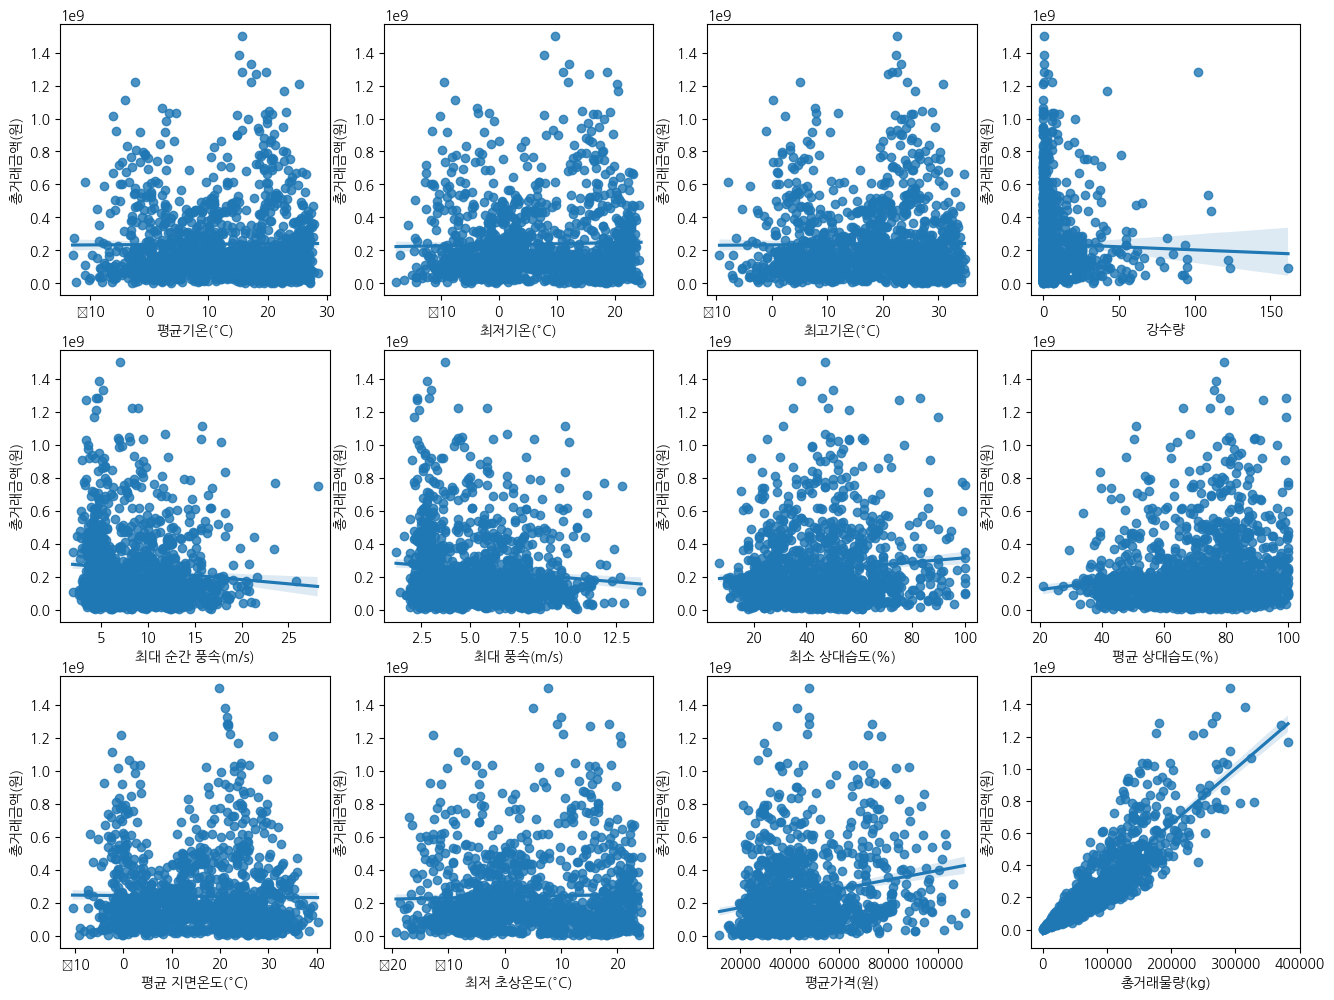

In [25]:
fig, axs = plt.subplots(figsize=(16,12), nrows=3, ncols=4)

for i, feature in enumerate(features):
    row = int(i / 4)
    col = i% 4
    sns.regplot(x=feature, y='총거래금액(원)', data=df, ax=axs[row][col])

## 위 산점도 시각화 자료를 통해 선형 회귀로 학습을 하는 것은 좋은 결과를 가져오지 못할 것을 알 수 있다.

##### 선형 회귀 모델 생성, 학습 및 예측 수행

In [19]:
reg = LinearRegression()

# 학습 수행
reg.fit(X_train, y_train)

# test data로 예측 수행 -> y_pred 
y_pred = reg.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE : {rmse:.3f}")

MSE : 8763604173059109.000, RMSE : 93614123.790


##### statsmodels 학습

In [20]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               총거래금액(원)   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     511.9
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:33:24   Log-Likelihood:                -17507.
No. Observations:                 892   AIC:                         3.504e+04
Df Residuals:                     879   BIC:                         3.510e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.449e+08   3.07e+07     -4.722